In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings("ignore")
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix
from sklearn.model_selection import GridSearchCV,cross_val_score
from sklearn.feature_selection import RFE
from mlxtend.feature_selection import SequentialFeatureSelector as sfs

In [2]:
df=pd.read_excel("storedata.xlsx")
df=df.drop(columns=['Unnamed: 0', 'index'],axis=1)
df.head()

,custid,retained,created,firstorder,lastorder,esent,eopenrate,eclickrate,avgorder,ordfreq,paperless,refill,doorstep,favday,city
0,6H6T6N,0,2012-09-28,2013-08-11 00:00:00,2013-08-11 00:00:00,29,100.000000,3.448276,14.52,0.000000,0,0,0,Monday,DEL
1,APCENR,1,2010-12-19,2011-04-01 00:00:00,2014-01-19 00:00:00,95,92.631579,10.526316,83.69,0.181641,1,1,1,Friday,DEL
2,7UP6MS,0,2010-10-03,2010-12-01 00:00:00,2011-07-06 00:00:00,0,0.000000,0.000000,33.58,0.059908,0,0,0,Wednesday,DEL
3,7ZEW8G,0,2010-10-22,2011-03-28 00:00:00,2011-03-28 00:00:00,0,0.000000,0.000000,54.96,0.000000,0,0,0,Thursday,BOM
4,8V726M,1,2010-11-27,2010-11-29 00:00:00,2013-01-28 00:00:00,30,90.000000,13.333333,111.91,0.008850,0,0,0,Monday,BOM


In [3]:
df['firstorder']= df.firstorder.astype('datetime64')
df['lastorder'] = df.lastorder.astype('datetime64')

In [4]:
df.set_index(["custid"],inplace=True)

In [5]:
df=pd.concat((df.drop(columns=['city','favday'],axis=1),pd.get_dummies(df[['favday','city']],drop_first=True)),axis=1)

In [6]:
x=df.drop(["retained","created","firstorder","lastorder"],axis=1)
y=df["retained"]
sc=StandardScaler()
scaled=sc.fit_transform(x)
xtrain,xtest,ytrain,ytest=train_test_split(scaled,y,test_size=0.3,random_state=2)

In [22]:
df.shape

(30781, 21)

In [23]:
adaboost=AdaBoostClassifier(n_estimators=3500)
adaboost.fit(xtrain,ytrain)

AdaBoostClassifier(n_estimators=3500)

In [24]:
ypredfull=adaboost.predict(xtest)
print("Classification report",classification_report(ytest,ypredfull))
print("accuracy",accuracy_score(ytest,ypredfull))
print("precision",precision_score(ytest,ypredfull,average=None))
print("recall score",recall_score(ytest,ypredfull,average=None))
print("f1_score",f1_score(ytest,ypredfull,average=None))

Classification report               precision    recall  f1-score   support

           0       0.93      0.82      0.87      1917
           1       0.95      0.98      0.97      7318

    accuracy                           0.95      9235
   macro avg       0.94      0.90      0.92      9235
weighted avg       0.95      0.95      0.95      9235

accuracy 0.9496480779642664
precision [0.92705882 0.95474453]
recall score [0.82211789 0.98305548]
f1_score [0.87144042 0.96869319]


In [48]:
adaboost=AdaBoostClassifier(n_estimators=1000)
adaboost.fit(xtrain,ytrain)

AdaBoostClassifier(n_estimators=1000)

In [49]:
ypredfull=adaboost.predict(xtest)
print("Classification report",classification_report(ytest,ypredfull))
print("accuracy",accuracy_score(ytest,ypredfull))
print("precision",precision_score(ytest,ypredfull,average=None))
print("recall score",recall_score(ytest,ypredfull,average=None))
print("f1_score",f1_score(ytest,ypredfull,average=None))

Classification report               precision    recall  f1-score   support

           0       0.93      0.82      0.88      1917
           1       0.96      0.98      0.97      7318

    accuracy                           0.95      9235
   macro avg       0.94      0.90      0.92      9235
weighted avg       0.95      0.95      0.95      9235

accuracy 0.9513806172171089
precision [0.93483412 0.95508149]
recall score [0.82316119 0.98496857]
f1_score [0.87545076 0.96979482]


In [25]:
cm=confusion_matrix(ytest,ypredfull)#3500 estimators
TN=cm[0][0]
TP=cm[1][1]
FP=cm[0][1]
FN=[1][0]
total=TN+TP+FP+FN
specificity=TN/(TN+FP)
sensitivity=TP/(TP+FN)
misclassified=((FP+FN)/total)*100
correctclassified=((TP+TN)/total)*100
print("specificity",specificity)
print("sensitivity",sensitivity)
print("misclassified percentage",misclassified)
print("correctclassified percentage",correctclassified)

specificity 0.8221178925404278
sensitivity 0.9998610145934677
misclassified percentage 3.753292361720808
correctclassified percentage 96.24670763827919


In [21]:
cm=confusion_matrix(ytest,ypredfull)
TN=cm[0][0]
TP=cm[1][1]
FP=cm[0][1]
FN=[1][0]
total=TN+TP+FP+FN
specificity=TN/(TN+FP)
sensitivity=TP/(TP+FN)
misclassified=((FP+FN)/total)*100
correctclassified=((TP+TN)/total)*100
print("specificity",specificity)
print("sensitivity",sensitivity)
print("misclassified percentage",misclassified)
print("correctclassified percentage",correctclassified)

specificity 0.8231611893583725
sensitivity 0.9998612845054793
misclassified percentage 3.7256191102344944
correctclassified percentage 96.27438088976551


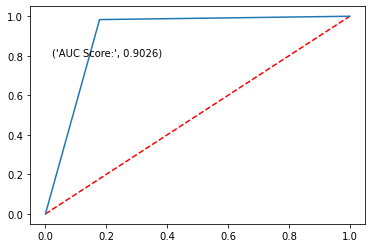

In [30]:
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(ytest, ypredfull)
plt.plot([0, 1], [0, 1],'r--')
plt.plot(fpr, tpr)

plt.text(x = 0.02, y = 0.8, s = ('AUC Score:',round(metrics.roc_auc_score(ytest, ypredfull),4)))
plt.grid(False)

Hyper parameter tunning

In [8]:
tunedparam=[{"n_estimators":[100, 120, 150, 200, 250, 300, 350],
   "learning_rate":[0.1, 0.01, 0.001, 0.15, 0.015] }]
adamodel=AdaBoostClassifier(random_state=5)
adagrid=GridSearchCV(adamodel,tunedparam,cv=5)
adagrid.fit(xtrain,ytrain)
adagrid.best_params_

{'learning_rate': 0.15, 'n_estimators': 350}

In [11]:
adaboost=AdaBoostClassifier(learning_rate=0.15,n_estimators=350)
adaboost.fit(xtrain,ytrain)

AdaBoostClassifier(learning_rate=0.15, n_estimators=350)

In [12]:
ypredfull=adaboost.predict(xtest)
print("Classification report",classification_report(ytest,ypredfull))
print("accuracy",accuracy_score(ytest,ypredfull))
print("precision",precision_score(ytest,ypredfull,average=None))
print("recall score",recall_score(ytest,ypredfull,average=None))
print("f1_score",f1_score(ytest,ypredfull,average=None))

Classification report               precision    recall  f1-score   support

           0       0.95      0.81      0.87      1917
           1       0.95      0.99      0.97      7318

    accuracy                           0.95      9235
   macro avg       0.95      0.90      0.92      9235
weighted avg       0.95      0.95      0.95      9235

accuracy 0.9502977801840823
precision [0.94559902 0.95130938]
recall score [0.80699009 0.98783821]
f1_score [0.8708134  0.96922974]


Feature: 0, Score: 0.32857
Feature: 1, Score: 0.18857
Feature: 2, Score: 0.05429
Feature: 3, Score: 0.19714
Feature: 4, Score: 0.13429
Feature: 5, Score: 0.02571
Feature: 6, Score: 0.02857
Feature: 7, Score: 0.01429
Feature: 8, Score: 0.00571
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.02000
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.00000
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00286


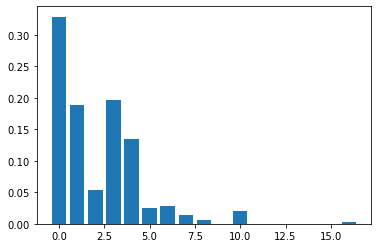

In [13]:
importance = adaboost.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [52]:
cm=confusion_matrix(ytest,ypredfull)
TN=cm[0][0]
TP=cm[1][1]
FP=cm[0][1]
FN=[1][0]
total=TN+TP+FP+FN
specificity=TN/(TN+FP)
sensitivity=TP/(TP+FN)
misclassified=((FP+FN)/total)*100
correctclassified=((TP+TN)/total)*100
print("specificity",specificity)
print("sensitivity",sensitivity)
print("misclassified percentage",misclassified)
print("correctclassified percentage",correctclassified)

specificity 0.8069900886802295
sensitivity 0.9998616874135546
misclassified percentage 4.05597463649284
correctclassified percentage 95.94402536350715


# Stacking

In [32]:
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [33]:
base=[("DecisionTree",DecisionTreeClassifier()),
     ("RandomForest",RandomForestClassifier()),
     ("GradientBoosting",GradientBoostingClassifier()),
     ("XGBClassifier",XGBClassifier())]
stack=StackingClassifier(estimators=base,final_estimator=AdaBoostClassifier(random_state=5))
stmodel=stack.fit(xtrain,ytrain)
ypred=stmodel.predict(xtest)
print("roc auc score",roc_auc_score(ytest,ypred))
print(classification_report(ytest,ypred))

[12:23:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:23:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:23:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:23:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

In [38]:
base=[("DecisionTree",DecisionTreeClassifier()),
     ("RandomForest",RandomForestClassifier()),
     ("GradientBoosting",GradientBoostingClassifier()),
     ("AdaBoostClassifier",AdaBoostClassifier())]
stack=StackingClassifier(estimators=base,final_estimator=XGBClassifier(random_state=5))
stmodel=stack.fit(xtrain,ytrain)
ypred=stmodel.predict(xtest)
print("roc auc score",roc_auc_score(ytest,ypred))
print(classification_report(ytest,ypred))

[12:44:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
roc auc score 0.9018600636442423
              precision    recall  f1-score   support

           0       0.93      0.82      0.87      1917
           1       0.95      0.98      0.97      7318

    accuracy                           0.95      9235
   macro avg       0.94      0.90      0.92      9235
weighted avg       0.95      0.95      0.95      9235



In [39]:
print("Classification report",classification_report(ytest,ypred))
print("accuracy",accuracy_score(ytest,ypred))
print("precision",precision_score(ytest,ypred,average=None))
print("recall score",recall_score(ytest,ypred,average=None))
print("f1_score",f1_score(ytest,ypred,average=None))

Classification report               precision    recall  f1-score   support

           0       0.93      0.82      0.87      1917
           1       0.95      0.98      0.97      7318

    accuracy                           0.95      9235
   macro avg       0.94      0.90      0.92      9235
weighted avg       0.95      0.95      0.95      9235

accuracy 0.9491066594477531
precision [0.92533804 0.95447306]
recall score [0.8210746  0.98264553]
f1_score [0.87009397 0.96835443]


In [40]:
base=[("DecisionTree",DecisionTreeClassifier()),
     ("RandomForest",RandomForestClassifier()),
     ("XGBClassifier",XGBClassifier()),
     ("AdaBoostClassifier",AdaBoostClassifier())]
stack=StackingClassifier(estimators=base,final_estimator=GradientBoostingClassifier(random_state=5))
stmodel=stack.fit(xtrain,ytrain)
ypred=stmodel.predict(xtest)
print("roc auc score",roc_auc_score(ytest,ypred))
print(classification_report(ytest,ypred))

[12:45:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:45:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:45:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:45:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

In [41]:
print("Classification report",classification_report(ytest,ypred))
print("accuracy",accuracy_score(ytest,ypred))
print("precision",precision_score(ytest,ypred,average=None))
print("recall score",recall_score(ytest,ypred,average=None))
print("f1_score",f1_score(ytest,ypred,average=None))

Classification report               precision    recall  f1-score   support

           0       0.94      0.83      0.88      1917
           1       0.96      0.99      0.97      7318

    accuracy                           0.95      9235
   macro avg       0.95      0.91      0.93      9235
weighted avg       0.95      0.95      0.95      9235

accuracy 0.9540877097996752
precision [0.9440809  0.95631454]
recall score [0.82785603 0.98715496]
f1_score [0.88215675 0.97149005]


In [43]:
base=[("DecisionTree",DecisionTreeClassifier()),
     ("GradientBoostingClassifier",RandomForestClassifier()),
     ("XGBClassifier",XGBClassifier()),
     ("AdaBoostClassifier",AdaBoostClassifier())]
stack=StackingClassifier(estimators=base,final_estimator=RandomForestClassifier(random_state=5))
stmodel=stack.fit(xtrain,ytrain)
ypred=stmodel.predict(xtest)
print("roc auc score",roc_auc_score(ytest,ypred))
print(classification_report(ytest,ypred))

[12:49:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:49:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:49:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:49:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

In [44]:
print("Classification report",classification_report(ytest,ypred))
print("accuracy",accuracy_score(ytest,ypred))
print("precision",precision_score(ytest,ypred,average=None))
print("recall score",recall_score(ytest,ypred,average=None))
print("f1_score",f1_score(ytest,ypred,average=None))

Classification report               precision    recall  f1-score   support

           0       0.93      0.84      0.88      1917
           1       0.96      0.98      0.97      7318

    accuracy                           0.95      9235
   macro avg       0.94      0.91      0.93      9235
weighted avg       0.95      0.95      0.95      9235

accuracy 0.9532214401732539
precision [0.92943898 0.95869971]
recall score [0.83828899 0.98332878]
f1_score [0.88151399 0.97085807]


In [46]:
base=[("GradientBoostingClassifier",GradientBoostingClassifier()),
     ("RandomForest",RandomForestClassifier()),
     ("XGBClassifier",XGBClassifier()),
     ("AdaBoostClassifier",AdaBoostClassifier())]
stack=StackingClassifier(estimators=base,final_estimator=DecisionTreeClassifier(random_state=5))
stmodel=stack.fit(xtrain,ytrain)
ypred=stmodel.predict(xtest)
print("roc auc score",roc_auc_score(ytest,ypred))
print(classification_report(ytest,ypred))

[12:59:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:00:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:00:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:00:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

In [47]:
print("Classification report",classification_report(ytest,ypred))
print("accuracy",accuracy_score(ytest,ypred))
print("precision",precision_score(ytest,ypred,average=None))
print("recall score",recall_score(ytest,ypred,average=None))
print("f1_score",f1_score(ytest,ypred,average=None))

Classification report               precision    recall  f1-score   support

           0       0.85      0.84      0.85      1917
           1       0.96      0.96      0.96      7318

    accuracy                           0.94      9235
   macro avg       0.90      0.90      0.90      9235
weighted avg       0.94      0.94      0.94      9235

accuracy 0.9360043313481321
precision [0.84712042 0.95918089]
recall score [0.84402713 0.96009839]
f1_score [0.84557094 0.95963942]


# Randomized Search CV

In [7]:
from sklearn.model_selection import RandomizedSearchCV
estimator=AdaBoostClassifier()
distributions={'learning_rate':[0.25,0.5,0.75,1.],
            'n_estimators':[100,250,500,650]}
rf=RandomizedSearchCV(estimator,distributions)
rf.fit(xtrain,ytrain)
rf.best_params_

{'n_estimators': 250, 'learning_rate': 1.0}

In [9]:
adaboost=AdaBoostClassifier(learning_rate=0.25,n_estimators=500)
adaboost.fit(xtrain,ytrain)

AdaBoostClassifier(learning_rate=0.25, n_estimators=500)

Feature: 0, Score: 0.25800
Feature: 1, Score: 0.12600
Feature: 2, Score: 0.04200
Feature: 3, Score: 0.37000
Feature: 4, Score: 0.12400
Feature: 5, Score: 0.01800
Feature: 6, Score: 0.01400
Feature: 7, Score: 0.01200
Feature: 8, Score: 0.00600
Feature: 9, Score: 0.00600
Feature: 10, Score: 0.01400
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.00000
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00200
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00800


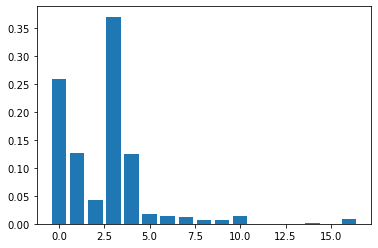

In [10]:
importance = adaboost.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [59]:
ypredfull=adaboost.predict(xtest)
print("Classification report",classification_report(ytest,ypredfull))
print("accuracy",accuracy_score(ytest,ypredfull))
print("precision",precision_score(ytest,ypredfull,average=None))
print("recall score",recall_score(ytest,ypredfull,average=None))
print("f1_score",f1_score(ytest,ypredfull,average=None))

Classification report               precision    recall  f1-score   support

           0       0.94      0.81      0.87      1917
           1       0.95      0.99      0.97      7318

    accuracy                           0.95      9235
   macro avg       0.95      0.90      0.92      9235
weighted avg       0.95      0.95      0.95      9235

accuracy 0.9505143475906876
precision [0.93922984 0.95299089]
recall score [0.81429317 0.98619841]
f1_score [0.8723107  0.96931032]


In [60]:
cm=confusion_matrix(ytest,ypredfull)
TN=cm[0][0]
TP=cm[1][1]
FP=cm[0][1]
FN=[1][0]
total=TN+TP+FP+FN
specificity=TN/(TN+FP)
sensitivity=TP/(TP+FN)
misclassified=((FP+FN)/total)*100
correctclassified=((TP+TN)/total)*100
print("specificity",specificity)
print("sensitivity",sensitivity)
print("misclassified percentage",misclassified)
print("correctclassified percentage",correctclassified)

specificity 0.8142931664058425
sensitivity 0.9998614574674425
misclassified percentage 3.9080459770114944
correctclassified percentage 96.0919540229885
